# 1 - Accelerate Learning with Batch Normalization

**Training deep neural networks** with tens of layers is challenging as they can be **sensitive to the initial random weights** and configuration of the learning algorithm. 

One possible reason for this difficulty is: 

> the distribution of the inputs to layers deep in the network may change after
each minibatch when the weights are updated. 

This can cause the learning algorithm to chase a moving target forever. This change in the distribution of inputs to layers in the network is referred to by the technical name **internal covariate shift**. 

**Batch normalization** is a technique for training very deep neural networks that standardize each minibatch layer's inputs. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks. This section will discover the batch normalization method used to accelerate deep learning neural networks training. After
reading this section, you will know:

- Deep neural networks are challenging to train, not least because the input from prior layers can change after weight updates.

- Batch normalization is a technique to standardize the inputs to a network, applied to either the activations of a prior layer or inputs directly.

- Batch normalization accelerates training, in some cases by halving the number of epochs (or better), and provides some regularization effect, reducing generalization error.

## 1.1 Batch Normalization

Training deep neural networks, e.g., networks with tens of hidden layers, is challenging. One aspect of this challenge is that the model is updated layer-by-layer backward from the output to the input using an **estimate of error that assumes the weights in the layers prior to the current
the layer are fixed**.

> Very deep models involve the composition of several functions or layers. The gradient tells how to update each parameter, under the assumption that the other layers do not change. In practice, we update all of the layers simultaneously.

**Because all layers are changed during an update**, the update procedure is forever chasing a moving target. For example, the weights of a layer are updated given an expectation that the prior layer outputs values with a given distribution. This distribution is likely changed after the
weights of the prior layer are updated.


> Training Deep Neural Networks is complicated by the fact that **the distribution of each layer's inputs changes during training as the parameters of the previous layers changes**. This slows down the training by **requiring lower learning rates** and **careful parameter initialization**, making it notoriously hard to train models with saturating nonlinearities.

## 1.2 Standardize Layer Inputs

Batch normalization, or **batch norm** for short, is [proposed as a technique](https://arxiv.org/pdf/1502.03167.pdf) to help coordinate the update of multiple layers in the model.

> Batch normalization provides an elegant way of reparametrizing almost any deep network. The reparametrization significantly **reduces the problem of coordinating updates across many layers**.

It does this by scaling the layer's output, specifically by **standardizing the activations of each input variable per minibatch**, such as the activations of a node from the previous layer. Recall that standardization refers to rescaling data to have a **mean of zero** and a **standard deviation of one**, e.g., a standard Gaussian.

Standardizing the activations of the prior layer means that assumptions the subsequent layer **makes about the spread and distribution of inputs during the weight update will not change**, at least not dramatically. <font color="red">This has the effect of stabilizing and speeding-up the training process of deep neural networks</font>.

> Batch normalization acts to standardize only the mean and variance of each unit in order to stabilize learning but allows the relationships between units and the nonlinear statistics of a single unit to change.

Normalizing the inputs to the layer affects the model's training, dramatically reducing the number of epochs required. **It can also have a regularizing effect**, reducing generalization error much like the use of activation regularization.

Although **reducing internal covariate shift** was a motivation in the development of the method,
there is some suggestion that instead batch normalization is effective because it smooths and, in
turn, **simplifies the optimization function that is being solved when training the network**.

> According to a [recent paper](https://arxiv.org/pdf/1805.11604.pdf), BatchNorm impacts network training fundamentally: **it makes the landscape of the corresponding optimization problem be significantly more smooth**. This ensures, in particular, that <font color="red">the gradients are more predictive and thus allow for the use of a more extensive range of learning rates and faster network convergence</font>.

## 1.3 How to Standardize Layer Inputs

Batch normalization can be **implemented during training by calculating each input variable's mean and standard deviation to a layer per minibatch** and using these statistics to perform the standardization. Alternately, a running average of mean and standard deviation can be
maintained across mini-batches but may result in unstable training.

This standardization of inputs may be applied to input variables for the first hidden layer or the activations from a hidden layer for deeper layers. In practice, it is common to allow the layer to learn two new parameters, namely a new mean and standard deviation, **Beta** and
**Gamma** respectively, that allow the automatic scaling and shifting of the standardized layer inputs. The model learns these parameters as part of the training process.

> Note that simply normalizing each input of a layer may change what the layer can represent. **These parameters are learned along with the original model parameters and restore the network's representation power**.

Significantly the backpropagation algorithm is updated to operate upon the transformed inputs, and error is also used to update the new scale and shifting parameters learned by the model. The standardization is applied to the inputs to the layer, namely the input variables or the output of the activation function from the last layer. Given the choice of activation function, the input distribution to the layer may be pretty non-Gaussian. In this case, there may be a benefit in standardizing the summed activation before the activation function in the previous layer.


> **We add the BN transform immediately before the nonlinearity**. We could have also normalized the layer inputs *u*, but since *u* is likely the output of another nonlinearity, the shape of its distribution is likely to change during training, and constraining its first and second moments would not eliminate the covariate shift.

## 1.4 Tips for Using Batch Normalization

This section provides tips and suggestions for using batch normalization with your own neural networks.

**Use With Different Network Types**

> Batch normalization is a general technique that can be used to normalize the inputs to a layer. It can be used with most network types, such as **Multilayer Perceptrons**, **Convolutional Neural Networks**, and **Recurrent Neural Networks**.


**Probably Use Before the Activation**

> Batch normalization may be used on the inputs to the layer before or after the activation function in the previous layer. It may be more **appropriate after the activation function for s-shaped functions** like the hyperbolic tangent and logistic function. It may be appropriate **before the activation function** for activations that may result in non-Gaussian distributions like
the **rectified linear activation function**, the modern default for most network types.

The goal of Batch Normalization is to achieve a stable distribution of activation values throughout training. In experiments conducted in the [original paper]((https://arxiv.org/pdf/1502.03167.pdf)), authors applied it before the nonlinearity since matching the first and second moments is more likely to result in a stable distribution.

**Use Large Learning Rates**

> Using batch normalization makes the network more stable during training. This may require a much greater learning rate than standard learning rates, which may further speed up the learning process.

**Less Sensitive to Weight Initialization**

> Deep neural networks can be pretty sensitive to the technique used to initialize the weights before training. The stability to training brought by batch normalization can make training deep networks less sensitive to the weight initialization method's choice.

**Do not Use With Dropout**

> Batch normalization offers some regularization effect, reducing generalization error, perhaps no longer requiring dropout for regularization.

Further, it may not be good to use batch normalization and dropout in the same network. The reason is that the statistics used to normalize the prior layer's activations may become noisy given the random dropping out of nodes during the dropout procedure.

## 1.5 Batch Normalization Case Study

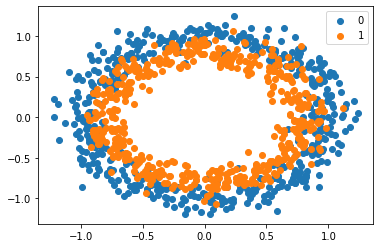

In [1]:
# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt

# generate circles
x, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

# select indices of points with each class label
for i in range(2):
	samples_ix = np.where(y == i)
	plt.scatter(x[samples_ix, 0], x[samples_ix, 1], label=str(i))
plt.legend()
plt.show()

### 1.5.1 Multilayer Perceptron Model

In [1]:
%%capture
!pip install wandb

In [2]:
!wandb login

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [3]:
# mlp for the two circles problem
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import wandb
from wandb.keras import WandbCallback

In [4]:
# Default values for hyperparameters
defaults = dict(layer_1 = 50,
                learn_rate = 0.01,
                batch_size = 32,
                epoch = 100)

wandb.init(project="lesson04_bn", 
           config= defaults, 
           name="lesson04_bn_run_01")
config = wandb.config

wandb: Currently logged in as: ivanovitchm (use `wandb login --relogin` to force relogin)


In [ ]:
%%wandb

# generate 2d classification dataset
x, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

# split into train and test
n_train = 500
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(config.layer_1, input_dim=2, 
                activation='relu', 
                kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=config.learn_rate, momentum=0.9)
model.compile(loss='binary_crossentropy', 
              optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y, 
                    validation_data=(test_x, test_y), 
                    epochs=config.epoch, verbose=0, 
                    batch_size=config.batch_size,
                    callbacks=[WandbCallback(log_weights=True,
                                             log_gradients=True,
                                             training_data=(train_x,train_y))])

# for more elaborate results please see the project in wandb

Train: 0.820, Test: 0.842


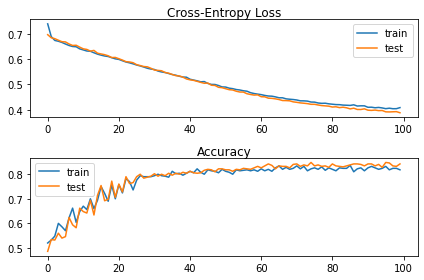

In [7]:
# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


### 1.5.2 Multilayer Perceptron with Batch Normalization

The model introduced in the previous section can be updated to add batch normalization. The expectation is that batch normalization would accelerate the training process, offering similar or better classification accuracy in fewer training epochs. Batch normalization is also reported as providing a subtle form of regularization, meaning that it may also offer a slight reduction in generalization error demonstrated by a small increase in classification accuracy on the holdout test dataset. A new BatchNormalization layer can be added to the model after the hidden layer before the output layer. Specifically, after the activation function of the last hidden layer.

In [6]:
# mlp for the two circles problem with batchnorm after activation function
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import wandb
from wandb.keras import WandbCallback

In [7]:
# Default values for hyperparameters
defaults = dict(layer_1 = 50,
                learn_rate = 0.01,
                batch_size = 32,
                epoch = 100)

wandb.init(project="lesson04_bn", config= defaults, name="lesson04_bn_run_02")
config = wandb.config

epoch,99
loss,0.40693
accuracy,0.828
val_loss,0.39208
val_accuracy,0.834
_runtime,34
_timestamp,1616963332
_step,99
best_val_loss,0.39208
best_epoch,99


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▇▇▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
accuracy,▁▂▃▃▅▆▅▆▆▆▆▇▇▇▇▇▇▇▇▇████████████████████
val_loss,██▇▇▇▇▆▆▆▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁
val_accuracy,▁▂▂▂▄▅▅▆▆▆▇▆▇▇▇▇▇▇██████████████████████
_runtime,▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇████
_timestamp,▁▁▁▂▂▂▂▂▂▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇████
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


In [8]:
%%wandb

# mlp for the two circles problem with batchnorm after activation function
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# generate 2d classification dataset
x, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

# split into train and test
n_train = 500
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(config.layer_1, 
                input_dim=2, 
                activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=config.learn_rate, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y,
                    validation_data=(test_x, test_y), 
                    epochs=config.epoch, verbose=0,
                    batch_size=config.batch_size,
                    callbacks=[WandbCallback(log_weights=True,
                                             log_gradients=True,
                                             training_data=(train_x,train_y))])

Train: 0.848, Test: 0.848


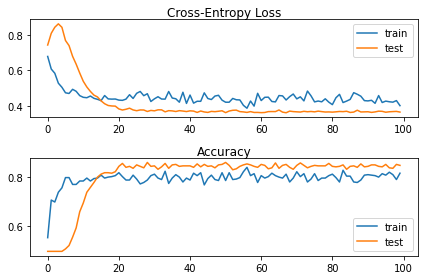

In [13]:
# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
# tensorflow.kera use non-trainable params with batch normalization
# in order to maintain auxiliary variables used in inference
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                150       
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 401
Trainable params: 301
Non-trainable params: 100
_________________________________________________________________


In this case, we can see the model's comparable performance on both the train and test set of about 84% accuracy, very similar to what we saw in the previous section, if not a little bit better.

A graph of the learning curves is also created, showing classification accuracy on each training epoch's train and test sets. In this case, we can see that the model has learned the problem faster than the model in the previous section without batch normalization. Specifically,
**we can see that classification accuracy on the train and test datasets leap above 80% within the first 20 epochs instead of 30-to-40 epochs in the model without batch normalization**. The plot also shows the effect of batch normalization during training. We can see lower performance
on the training dataset than the test dataset: scores on the training dataset that are lower than the test dataset's performance at the end of the training run. This is likely the effect of the input collected and updated each minibatch.


We can also try a variation of the model where batch normalization is applied prior to the activation function of the hidden layer, instead of after the activation function.

In [16]:
# mlp for the two circles problem with batchnorm before activation function
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [17]:
# Default values for hyperparameters
defaults = dict(layer_1 = 50,
                learn_rate = 0.01,
                batch_size = 32,
                epoch = 100)

wandb.init(project="lesson04_bn", config= defaults, name="lesson04_bn_run_03")
config = wandb.config

epoch,99
loss,0.40048
accuracy,0.816
val_loss,0.36415
val_accuracy,0.848
_runtime,85
_timestamp,1616958482
_step,99
best_val_loss,0.36037
best_epoch,67


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▆▃▃▂▂▂▂▂▂▃▂▂▂▂▃▃▂▂▃▂▂▁▁▂▂▂▂▂▃▂▂▂▂▃▂▂▂▂▁
accuracy,▁▅▇▇▇▇▇▇█▇▇▇██▇▇▇█▇▇▇▇██▇█▇▇▇▇▇▇▇█▇▇▇▇██
val_loss,▇█▇▆▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▂▅▆▇▇█████████████▇██████████████████
_runtime,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇███
_timestamp,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


In [ ]:
%%wandb
# generate 2d classification dataset
x, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

# split into train and test
n_train = 500
train_x, test_x = x[:n_train, :], x[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(config.layer_1, input_dim=2, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
opt = SGD(lr=config.learn_rate, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(train_x, train_y, 
                    validation_data=(test_x, test_y), 
                    epochs=config.epoch, verbose=0,
                    callbacks=[WandbCallback(log_weights=True,
                                             log_gradients=True,
                                             training_data=(train_x,train_y))])

In [20]:
# tensorflow.kera use non-trainable params with batch normalization
# in order to maintain auxiliary variables used in inference
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                150       
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 401
Trainable params: 301
Non-trainable params: 100
_________________________________________________________________


Train: 0.818, Test: 0.832


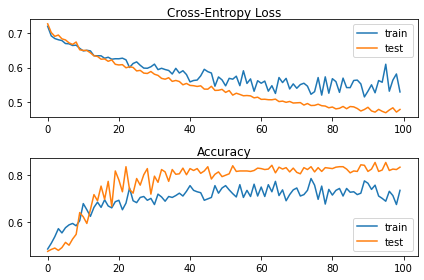

In [19]:
# evaluate the model
_, train_acc = model.evaluate(train_x, train_y, verbose=0)
_, test_acc = model.evaluate(test_x, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
plt.subplot(211)
plt.title('Cross-Entropy Loss', pad=-40)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy learning curves
plt.subplot(212)
plt.title('Accuracy', pad=-40)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.tight_layout()
plt.show()

In this case, we can see the model's comparable performance on the train and test datasets, but slightly worse than the model without batch normalization.

The line plot of the learning curves on the train and test sets also tells a different story. The plot shows the model learning perhaps at the same pace as the model without batch normalization, but the model's performance on the training dataset is much worse, hovering around 70% to 75% accuracy, again likely an effect of the statistics collected and used over each minibatch. At least for this model configuration on this specific dataset, it appears that batch normalization is more effective after the rectified linear activation function.

### 1.5.3 Extensions

This section lists some ideas for extending the case study that you may wish to explore.

- **Without Beta and Gamma**: update the example to not use the beta and gamma parameters in the batch normalization layer and compare results.
- **Without Momentum**: update the example not to use momentum in the batch normalization layer during training and compare results.
- **Input Layer**: update the example to use batch normalization after the input to the model and compare results.